<a href="https://colab.research.google.com/github/tanay47/Netflix-Movie-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# Alright, let's start with our analysis.
###Let's start with importing relevant libraries.

###Dependencies  first

In [1]:
# importing all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV    
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import stopwords

from collections import Counter 
from wordcloud import WordCloud
import re

In [2]:
# mounting notebook to load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load and store dataset to a varible.
net_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING - Tanay Tupe/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [4]:
net_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


###Our data is mounted and ready to be operated. Let's check basic information of our dataset first.

In [5]:
# checking shape of dataset
net_df.size

93444

In [6]:
# checking shape of dataset
net_df.shape

(7787, 12)

In [7]:
# check all columns.
net_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# basic information of dataset
net_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### So, we have total of "7787" observations and "12" columns. Also, we have few null values in our dataset. Particularly in "director", "cast", "date_added" etc.

###Check for duplicate observations

In [9]:
# check for duplicated observations.
len(net_df[net_df.duplicated()])

0

### Great, we also don't have any duplicate observations as well.

# Exploratory Data Analysis.

###Let's dig into dataset even more and find answers to some questions using EDA.








###Which content type is Netflix more focused on.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


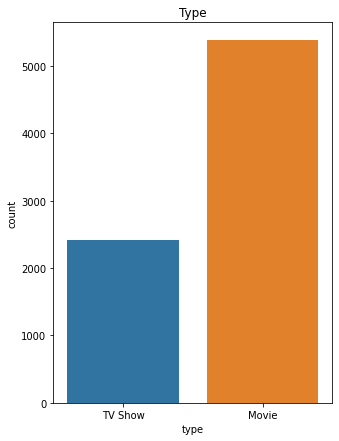

In [10]:
# plotting a countplot of TV Series and Movies form "type" feature.
plt.figure(figsize = (5,7))
sns.countplot(net_df['type'])
fig = plt.gcf()
plt.title('Type')
plt.show()

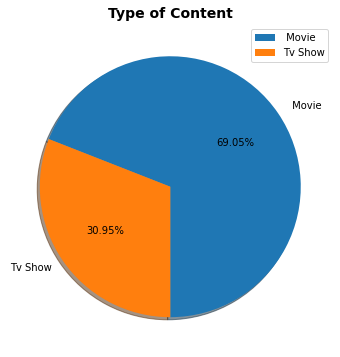

In [11]:
# plotting pie chart for 
plt.figure(figsize=(6,6))
labels = [" Movie",'Tv Show']
values = net_df['type'].value_counts().values
plt.pie(values, labels=labels, autopct='%1.2f%%', shadow=True,startangle=270)
plt.title('Type of Content',
          fontsize=14, fontweight='bold')
plt.legend()
plt.show()

### It's clear that, Netflix focuses on movies more than TV Shows.

### Let's understanding what type content is available in different countries.

In [12]:
# grouping net_df on country having no of counting more than 90.
grouped_country = pd.DataFrame(net_df.groupby("country").size() > 90)
grouped_country

,0
country,
Argentina,False
"Argentina, Brazil, France, Poland, Germany, Denmark",False
"Argentina, Chile",False
"Argentina, Chile, Peru",False
"Argentina, France",False
...,...
Venezuela,False
"Venezuela, Colombia",False
Vietnam,False


In [13]:
# storing top countries
top_countries = grouped_country[ net_df.groupby('country').size() > 90]
top_countries.reset_index(inplace=True)
top_countries

,country,0
0,Canada,True
1,Egypt,True
2,France,True
3,India,True
4,Japan,True
5,Mexico,True
6,South Korea,True
7,Spain,True
8,Turkey,True
9,United Kingdom,True


In [14]:
# merging "country" and "listed_in" to above dataframe using left join
top_countries = top_countries.merge(net_df[["country", "listed_in"]], on='country', how='left')

In [15]:
# list of top countries
list_of_top_countries = list(top_countries.country.unique())
list_of_top_countries

['Canada',
 'Egypt',
 'France',
 'India',
 'Japan',
 'Mexico',
 'South Korea',
 'Spain',
 'Turkey',
 'United Kingdom',
 'United States']

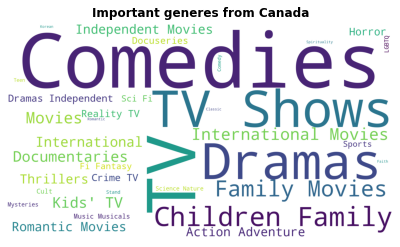

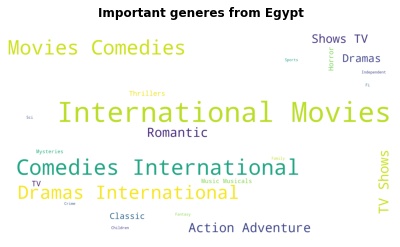

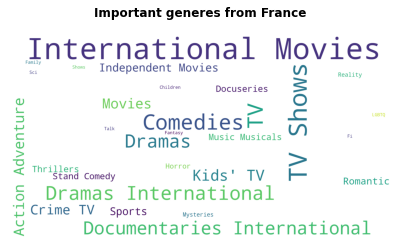

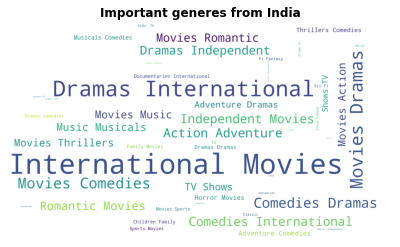

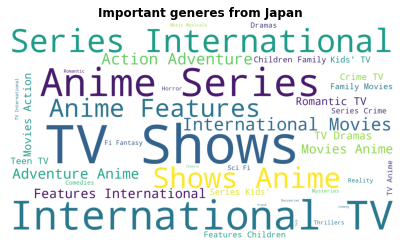

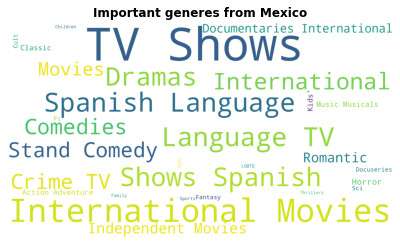

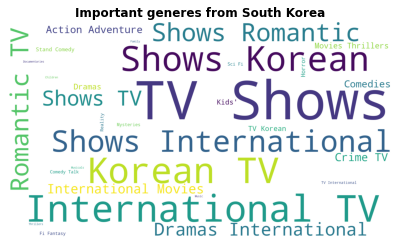

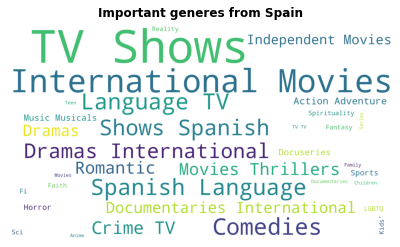

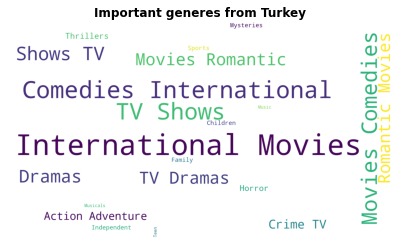

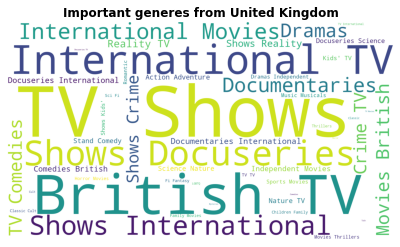

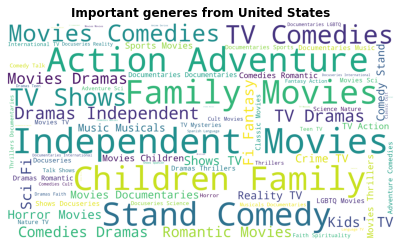

In [16]:
# using wordcloud to visually display most viewed content with respect to country
for country in list_of_top_countries:
  country_sub_df = top_countries[ top_countries['country'] == country ]
  
  plt.subplots(figsize=(7,4))
  wordcloud = WordCloud(
                            background_color='white',
                            width=1920,
                            height=1080
                          ).generate(" ".join(country_sub_df.listed_in))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.savefig('category.png')
  plt.title(f'Important generes from {country}', fontweight="bold")
  plt.show()

###Next, we find most occurred topics in all records

In [17]:
def top_words_counter(document):
  " function to count top 20 words from given document. returns a tuple with word and it's value "
  return Counter(" ".join(document).split()).most_common(20)

In [18]:
top_words = pd.DataFrame(top_words_counter(net_df['listed_in']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


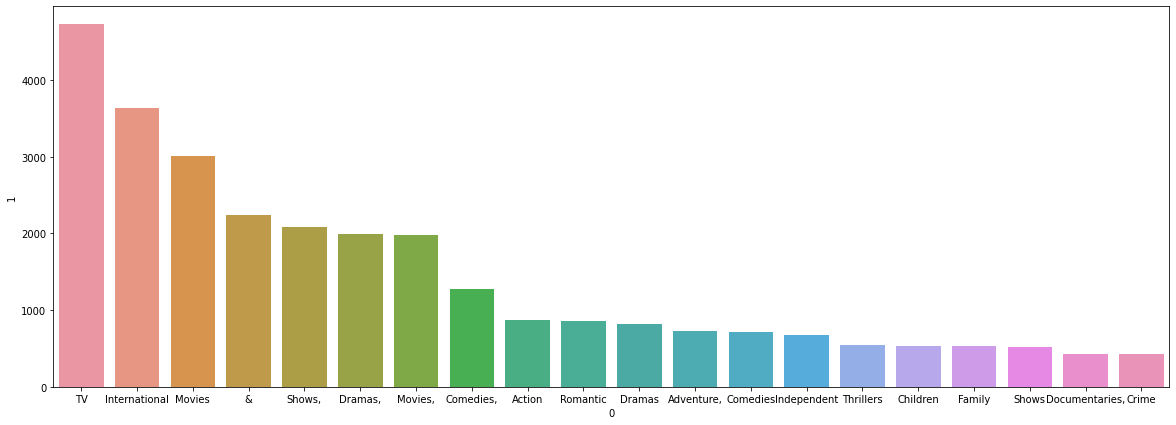

In [19]:
# plotting a bargraph
plt.figure(figsize=(20,7))
sns.barplot( top_words[0], top_words[1])

###Here we see top genres available throughout dataset.

## Let's analyze movie duration distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot of movie duration')

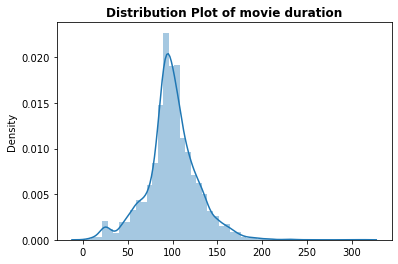

In [20]:
# plotting the distribution plot for movie timings
plt.figure(figsize=(6,4))
movie_set = net_df[ net_df['type'] == "Movie"]
time = movie_set['duration'].str.extract('(\d+)')
sns.distplot(time)
plt.title(f"Distribution Plot of movie duration", fontweight="bold")

###Movie length seems to have a normal distribution, with most of the movies having "100" min run time.

##Let's check top actors and directors.

In [21]:
# counting movies per actor storing in a dict
actors_movies = list(movie_set['cast'])
cast_record = []
for i in actors_movies:
    i=list(str(i).split(','))
    for j in i:
        cast_record.append(j.replace(' ',""))
cast_dict =Counter(cast_record)

In [22]:
# converting into dataframe for sorting
cast_df = pd.DataFrame(cast_dict, index= np.arange(0,1))

In [23]:
# sorted top cast dataframe
top_cast = cast_df.transpose().reset_index().sort_values(by=0,ascending=False)
top_cast

,index,0
142,nan,426
1051,AnupamKher,41
3115,ShahRukhKhan,35
560,NaseeruddinShah,30
1796,OmPuri,30
...,...,...
10131,BelleShouse,1
10132,DouglasTait,1
10133,MattLasky,1
10134,JenniferBlanc,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top actors with most movies')

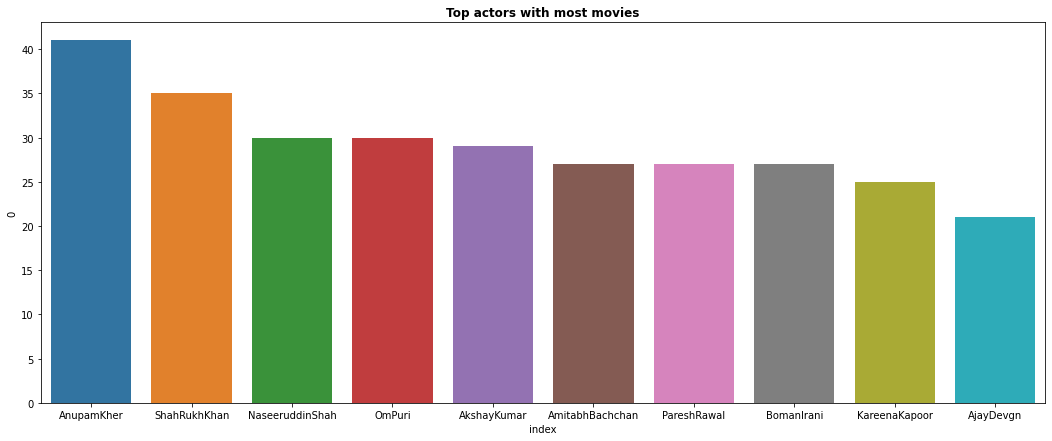

In [24]:
# plotting a bargraph of top actors
plt.figure(figsize=(18,7))
sns.barplot(top_cast["index"].iloc[1:11], top_cast[0].iloc[1:11])
plt.title(f"Top actors with most movies", fontweight="bold")

###So these are top actors who acted in most number of movies

In [25]:
# counting movies per actor storing in a dict
dir_movies = list(movie_set['director'])
dir_record = []
for i in dir_movies:
    i=list(str(i).split(','))
    for j in i:
        dir_record.append(j.replace(' ',""))
dir_dict =Counter(dir_record)

In [26]:
# converting into dataframe for sorting
dir_df = pd.DataFrame(dir_dict, index= np.arange(0,1))

In [27]:
# sorted top cast dataframe
top_dir = dir_df.transpose().reset_index().sort_values(by=0,ascending=False)
top_dir

,index,0
14,nan,163
285,JanSuter,21
284,RaúlCampos,19
411,MarcusRaboy,15
243,JayKaras,15
...,...,...
1726,SajidKhan,1
1727,LucyvanBeek,1
1728,RemiWeekes,1
1729,JenniferLynch,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top directors with most movies')

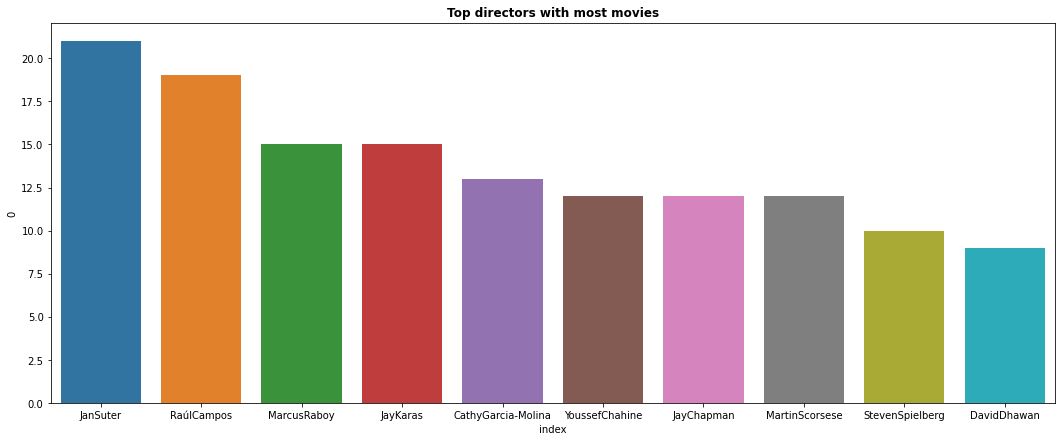

In [28]:
# plotting a bargraph of top actors
plt.figure(figsize=(18,7))
sns.barplot(top_dir["index"].iloc[1:11], top_dir[0].iloc[1:11])
plt.title(f"Top directors with most movies", fontweight="bold")

###Top directors with most movies.

# Preprocessing